In [56]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from xgboost import plot_importance, XGBClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from time import time
import umap
import seaborn as sns

In [57]:
X = np.load('X.npy')
Y = np.load('Y.npy')

In [58]:
X_flat = np.array(X).reshape((2062, 64*64))

In [59]:
Ydf = DataFrame(data=Y, columns=[9-x for x in range(10)])
Ydf = Ydf[[x for x in range(10)]]
Ydf['class']='C' + (Ydf[range(10)].idxmax(axis=1)).astype('str')
Ydf[['class']]
Y2 = Ydf[['class']].to_numpy()

In [60]:
Y2.shape

(2062, 1)

In [61]:
Y2 = Y2.reshape(Y2.shape[0])

In [62]:
X_train, X_valid, y_train, y_valid = train_test_split(X_flat, Y2, test_size=0.3, random_state=42)

## XGBoost

In [63]:
model = XGBClassifier()

In [64]:
t_0 = time()
model.fit(X_train,y_train)
Duration_XGB = time() - t_0

In [65]:
y_pred = model.predict(X_valid)

In [66]:
conf_mat = confusion_matrix(y_valid, y_pred)

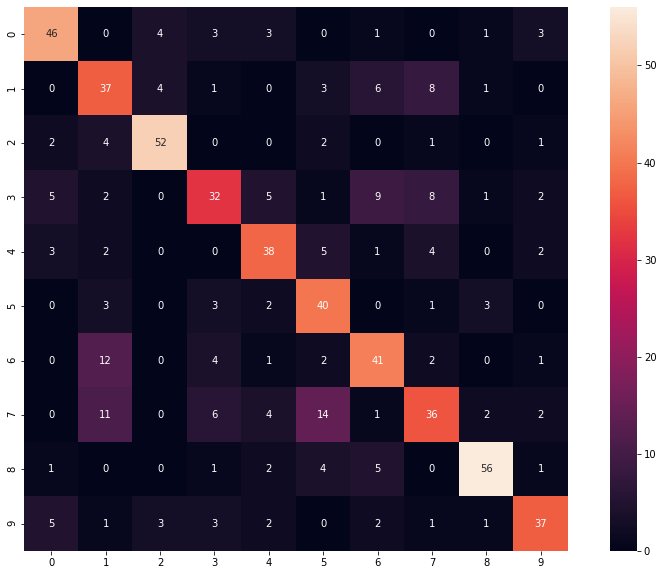

In [83]:
#display(DataFrame(data=conf_mat))
plt.figure(figsize=(15,10))
sns.heatmap(conf_mat,square=True, annot=True, fmt='.0f')
plt.show()

In [68]:
accuracy = accuracy_score(y_valid, y_pred)
print(accuracy)

0.7431340872374798


## PCA

In [69]:
pca_dims = PCA()
pca_dims.fit(X_train)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [70]:
d

292

In [71]:
pca_dims = PCA(n_components=d)
X_pca_train = pca_dims.fit_transform(X_train)
X_pca_valid = pca_dims.transform(X_valid)

## XGBoost over PCA

In [72]:
model_pca = XGBClassifier()
t_0 = time()
model_pca.fit(X_pca_train,y_train)
Duration_XGB_PCA = time() - t_0

In [73]:
y_pca_pred = model_pca.predict(X_pca_valid)

In [74]:
print(accuracy_score(y_valid, y_pca_pred))

0.6704361873990307


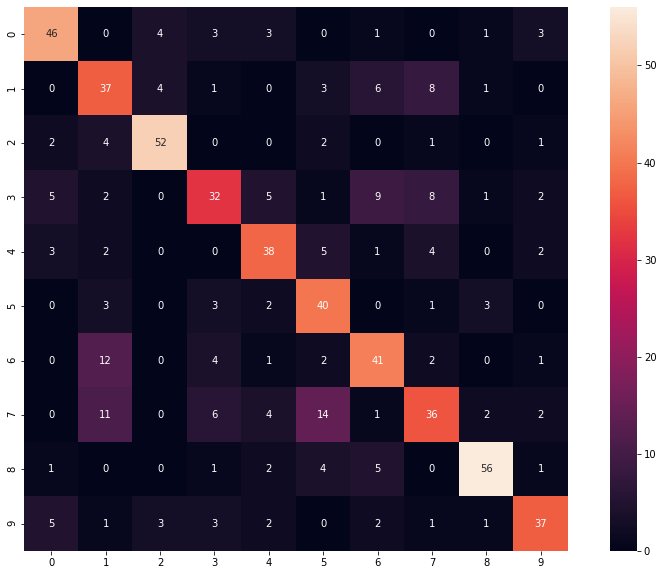

In [82]:
conf_mat = confusion_matrix(y_valid, y_pca_pred)
plt.figure(figsize=(15,10))
sns.heatmap(conf_mat,square=True, annot=True, fmt='.0f')
plt.show()

## SVM

In [76]:
model_svm = svm.SVC(gamma='scale')
t_0 = time()
model_svm.fit(X_train,y_train)
Duration_SVM = time() - t_0

In [77]:
y_pred_svm = model_svm.predict(X_valid)

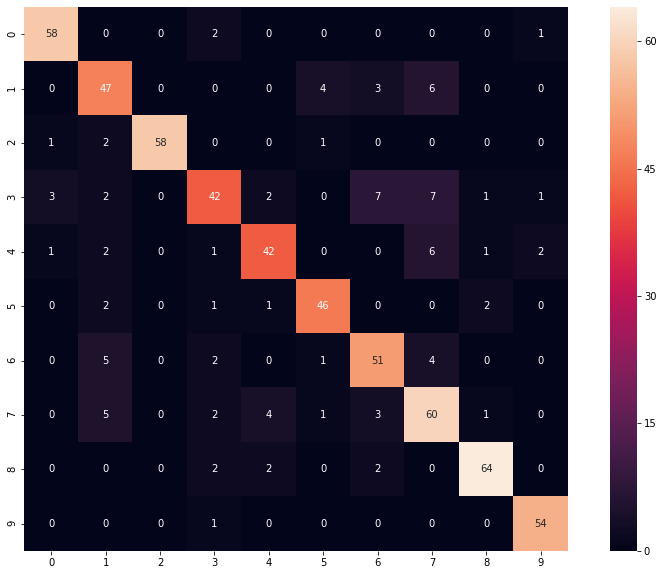

0.8432956381260097


In [78]:
conf_mat = confusion_matrix(y_valid, y_pred_svm)
plt.figure(figsize=(15,10))
sns.heatmap(conf_mat,square=True, annot=True, fmt='.0f')
plt.show()
print(accuracy_score(y_valid, y_pred_svm))

## SVM over PCA

In [79]:
model_svm_pca = svm.SVC(gamma='scale')
t_0 = time()
model_svm_pca.fit(X_pca_train,y_train)
Duration_SVM_PCA = time() - t_0

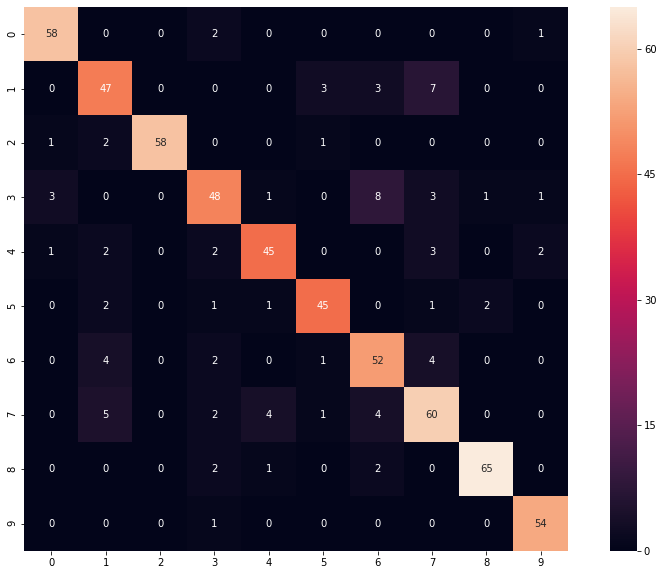

0.8594507269789984


In [80]:
y_pred_svm_pca = model_svm_pca.predict(X_pca_valid)
conf_mat = confusion_matrix(y_valid, y_pred_svm_pca)
plt.figure(figsize=(15,10))
sns.heatmap(conf_mat,square=True, annot=True, fmt='.0f')
plt.show()
print(accuracy_score(y_valid, y_pred_svm_pca))

In [81]:
print('XGBoost Computation time: ' + str(Duration_XGB))
print('XGBoost over PCA Computation time: ' + str(Duration_XGB_PCA))
print('SVM Computation time: ' + str(Duration_SVM))
print('SVM over PCA Computation time: ' + str(Duration_SVM_PCA))

XGBoost Computation time: 135.40563869476318
XGBoost over PCA Computation time: 19.35740566253662
SVM Computation time: 9.974087238311768
SVM over PCA Computation time: 0.8483443260192871
